### Problem Statement

Objective:
To analyze and group Spotify tracks based on their audio features using unsupervised machine learning techniques. The goal is to uncover hidden patterns or natural groupings among songs that can help in tasks like playlist generation, music recommendation, or listener behavior analysis.

### Key Goals:

* Preprocess the dataset to clean and scale relevant numerical features.
* Visualize high-dimensional audio features using dimensionality reduction (PCA).
* Cluster songs using:
* KMeans (with the Elbow method to choose k)
* Agglomerative (Hierarchical) Clustering (with dendrogram for cluster insight)
* Compare and interpret the clusters to understand the underlying grouping of songs.

### Why is this important?

* For music streaming platforms: Helps in automatically categorizing songs into genres or moods without manual labeling.
* For users: Can improve music recommendation engines by understanding song similarity beyond metadata.
* For artists: Gives insights into where their music stands in comparison with others.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Load data

In [2]:
data = pd.read_csv('spotify_tracks.csv')
df = pd.DataFrame(data)
df.tail(50)

,id,name,genre,artists,album,popularity,duration_ms,explicit
6250,3ltuMrMRRvdBKcmkPTFddF,World Music Bar,world-music,Beau Jingles,Beau Jingles 2,27,38105,False
6251,2SE11vmjbi7j5QKJ885ib6,World A Music,world-music,iNi Kamoze,Ini Kamoze,51,345493,False
6252,2EgWy96ieZjEQbRaTrvGbe,Exile,world-music,Joseph Tawadros,World Music,25,166786,False
6253,2ZqK1xHlQBKLDb3pK5g43X,Bog Down In The Valley-O,world-music,World Music,Irish Drinking Songs,17,168533,False
6254,0UVBCjKSuCYlVNlYBmziPi,Gardens of Seville,world-music,Global Village Players,Sounds of the World: A Musical Journey,31,70275,False
6255,0o3ULQkMrBXiK9o9VQ8K26,Felucca,world-music,Joseph Tawadros,World Music,30,108373,False
6256,4O4AmtYEYhOe1Vlpq46qhP,Ice Cream (Milkshake),world-music,Asian Pop Addicts,Asian Pop,16,201298,False
6257,4hACoZiQ0cc9K8fuEQGXL2,Part of Your World - Music Box,world-music,The Tiny Boppers,My Favourite Lullaby Album,30,120285,False
6258,0xB3bu2aYr3KJAhMC3sRKc,Snow Fall,world-music,Joseph Tawadros,World Music,24,89506,False
6259,2zpLkW4Qb6mWm2cXErEe6T,Wild Rhythms,world-music,Mysterious World Music,African Dance: Traditional Drums Music,34,228200,False


In [3]:
# drop column

df.drop(columns = 'id', inplace =True)

### Checked data types of all columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6300 non-null   object
 1   genre        6300 non-null   object
 2   artists      6300 non-null   object
 3   album        6300 non-null   object
 4   popularity   6300 non-null   int64 
 5   duration_ms  6300 non-null   int64 
 6   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 301.6+ KB


### Number of rows and columns

In [5]:
df.shape

(6300, 7)

In [6]:
df.describe()

,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


### Checked Null values in dataset

In [7]:
df.isnull().sum()

name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [8]:
# drop duplicate values

df.drop_duplicates(inplace=True)

In [9]:
# copy dataset

df_copy = df.copy()

In [10]:
df_copy = df.drop(columns = 'name')
df_copy

,genre,artists,album,popularity,duration_ms,explicit
0,acoustic,Billy Raffoul,1975,58,172199,False
1,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...
6295,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,world-music,Joseph Tawadros,World Music,12,69533,False
6298,world-music,Future World Music,Behold,26,90001,False


In [11]:
LE = LabelEncoder()
SS = StandardScaler()

In [12]:
for i in df_copy: 
    if df_copy[i].dtypes == 'object' or 'bool': 
        df_copy[i] = LE.fit_transform(df_copy[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6299 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6299 non-null   object
 1   genre        6299 non-null   object
 2   artists      6299 non-null   object
 3   album        6299 non-null   object
 4   popularity   6299 non-null   int64 
 5   duration_ms  6299 non-null   int64 
 6   explicit     6299 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 350.6+ KB


In [14]:
x_columns = df_copy.columns

In [15]:
df_copy = SS.fit_transform(df_copy)

In [16]:
# df_num = df.select_dtypes(include='number')

In [17]:
# Elbow method to choose the optimal number of clusters

k_values = list(range(2,8))
k_values

[2, 3, 4, 5, 6, 7]

In [26]:
wcss = []

for i in k_values: 
    kmodel = KMeans(n_clusters=i, max_iter=5000, random_state=23)
    kmodel.fit(df_copy)
    wcss.append(kmodel.inertia_)

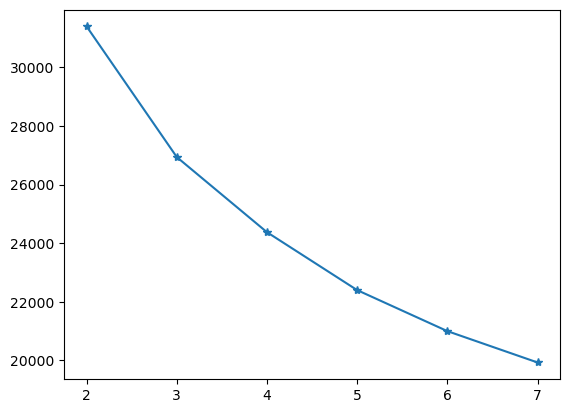

In [27]:
plt.plot(k_values, wcss, marker = '*')

In [28]:
df_update = pd.DataFrame(df_copy, columns=x_columns)

In [29]:
df_update

,genre,artists,album,popularity,duration_ms,explicit
0,-1.718179,-1.377298,-1.700240,1.365798,-0.378683,-0.48337
1,-1.718179,-1.377298,-1.663555,1.315660,-0.378048,-0.48337
2,-1.718179,0.280250,-0.406388,0.563582,-0.899085,-0.48337
3,-1.718179,1.170345,-0.931972,0.764136,-1.302080,-0.48337
4,-1.718179,-0.517299,0.222900,0.112336,-1.062187,-0.48337
...,...,...,...,...,...,...
6294,1.718410,-0.624140,0.615853,-0.288772,-0.231447,-0.48337
6295,1.718410,0.633128,-0.571471,-0.288772,1.282797,-0.48337
6296,1.718410,-0.248690,1.572485,-0.940572,-1.658111,-0.48337
6297,1.718410,-0.624140,-1.408877,-0.238633,-1.530549,-0.48337


In [30]:
kmodel.labels_

array([2, 2, 2, ..., 6, 6, 6])

In [31]:
kmodel = KMeans(n_clusters=3, max_iter=5000, random_state=23)

kmodel.fit(df_update)

In [33]:
kmodel.labels_

array([2, 2, 2, ..., 1, 2, 1])

In [45]:
df['label'] = kmodel.labels_

In [46]:
df

,name,genre,artists,album,popularity,duration_ms,explicit,label
0,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,2
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,2
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,2
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,2
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False,2
...,...,...,...,...,...,...,...,...
6295,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False,1
6296,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False,1
6297,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False,1
6298,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False,2


<Axes: xlabel='popularity', ylabel='duration_ms'>

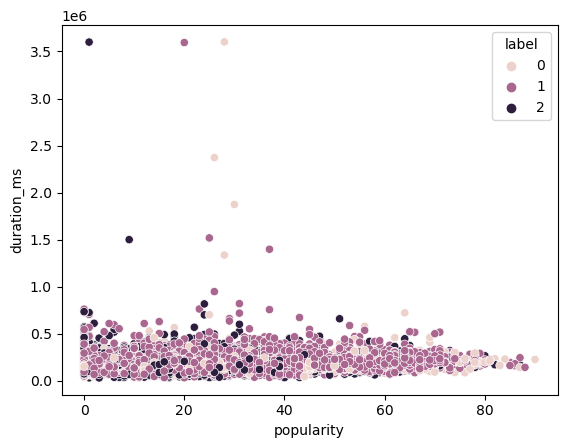

In [50]:
sns.scatterplot(data = df, x = 'popularity', y = 'duration_ms', hue = 'label')

In [49]:
first = df[df['label']==1]
first

,name,genre,artists,album,popularity,duration_ms,explicit,label
13,The One (Acoustic Cover),acoustic,The Moon Loungers,The One (Acoustic Cover),25,241115,False,1
21,The Sound of Silence - Acoustic Version,acoustic,Simon & Garfunkel,"Wednesday Morning, 3 A.M.",71,185413,False,1
24,Where's My Love - Acoustic,acoustic,SYML,Where's My Love,68,239880,False,1
48,Young Blood - Acoustic,acoustic,Noah Kahan,Young Blood (Acoustic),56,200613,False,1
72,Stubborn (with Asake),afrobeat,"Victony, Asake",Stubborn (with Asake),67,176333,False,1
...,...,...,...,...,...,...,...,...
6294,Kilimanjaro,world-music,World Music Atelier,Africa Essential of African Music,3,215771,False,1
6295,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False,1
6296,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False,1
6297,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False,1


In [51]:
# deploy model

import joblib

In [55]:
joblib.dump(kmodel, 'KMeans_model.pkl')

['KMeans_model.pkl']

In [62]:
# Test final model

l_model = joblib.load('KMeans_model.pkl')

In [61]:
l_model.predict([[-1.718179, 0.280250, -0.406388, 0.563582, -0.899085,-0.48337]])

array([2])